In [18]:
#Preprocessing 1 : Data Load

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn import metrics

import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import *
import category_encoders as ce

from sklearn import metrics

from sklearn.cluster import AffinityPropagation
from sklearn.cluster import DBSCAN
from pyclustering.cluster.clarans import clarans

import category_encoders as ce
import pandas as pd
import numpy as np
import tensorflow as tf

pd.set_option('display.max_row', 10)
pd.set_option('display.max_columns', 10)

df = pd.read_csv("housing.csv")

df




,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [19]:
#Preprocessing 2 : 

df_label = df.drop(["median_house_value"], axis = 1)
df_target = df["median_house_value"]

print(df_label)
print(df_target)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income ocean_

In [20]:
# Preprocessing 3 : 

df_label.isna().sum() #total_bedrooms = 207

df_label.dropna(axis = 0, how = 'any', inplace = True)

df_label #20640 - 207 = 20433

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [21]:
#Encoding Function
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
    
def Encoding(dataframe, mode) :

    categorized_column = dataframe.select_dtypes(include=["category", "object"])
    
    if mode == "label" :
        res = categorized_column.apply(LabelEncoder().fit_transform)

    elif mode == "ordinal" :
        enc = ce.OrdinalEncoder()
        if len(categorized_column.columns) == 1 :
            res = enc.fit_transform(categorized_column)
        else :
            res = categorized_column.apply(enc.fit_transform)
        
    elif mode == "onehot" :
        enc = ce.OneHotEncoder()
        if len(categorized_column.columns) == 1 :
            res = enc.fit_transform(categorized_column)
        else :
            res = categorized_column.apply(enc.fit_transform)
            
    
        
    #Merge into original dataframe
    deleted_attr = dataframe.drop(categorized_column, axis = 1)
    dataframe = pd.concat([deleted_attr, res],axis=1, join='inner')
    
    
    return dataframe

In [22]:
#Scaling
def Scaling (dataframe, mode) :

    if mode == "minmax" :
        scaler = preprocessing.MinMaxScaler()
    
    elif mode == "standard" :
        scaler = preprocessing.StandardScaler()
    
    elif mode == "robust" :
        scaler = preprocessing.RobustScaler()
    
    elif mode == "normal" :
        scaler = Normalizer()
    
    scaled_dataframe = scaler.fit_transform(dataframe)
    
    scaled_dataframe = pd.DataFrame(data=scaled_dataframe, columns=dataframe.columns)

    return scaled_dataframe

In [23]:
#feature_selection function
def feature_selection (dataframe, target) :

    dataframe_label = dataframe.drop(labels=target.name, axis = 1)

    cov_data = dataframe.cov().unstack()
 
    cor_list = cov_data.unstack()[df_target.name].sort_values(kind="quicksort").index[0:len(dataframe.columns)-1]
    
    deleted_feat = list(cor_list)

    dataframe_collection = {} 

    for i in range(0, 5) :
        inserted_dataframe = dataframe_label.drop(labels=deleted_feat[i], axis = 1)
        dataframe_collection[i] = inserted_dataframe

    return dataframe_collection

In [24]:
#main 함수 1 : Visualizing the Clustering Result (Hard to Analysis)

df.dropna(axis = 0, how = 'any', inplace = True)

cluster2 = []
p20 = df['median_house_value'].quantile(q=0.2, interpolation='nearest')
p40 = df['median_house_value'].quantile(q=0.4, interpolation='nearest')
p60 = df['median_house_value'].quantile(q=0.6, interpolation='nearest')
p80 = df['median_house_value'].quantile(q=0.8, interpolation='nearest')

df_idx = [i for i in range(0, len(df['median_house_value']))]
df.index = df_idx

for i in range (0, 20433) :
    
    if df['median_house_value'][i] < p20 :
        cluster2.append(int("0"))
    
    elif (df['median_house_value'][i] >= p20) and (df['median_house_value'][i] < p40) :
        cluster2.append(int("1"))
        
    elif (df['median_house_value'][i] >= p40) and (df['median_house_value'][i] < p60) :
        cluster2.append(int("2"))
        
    elif (df['median_house_value'][i] >= p60) and (df['median_house_value'][i] < p80) :
        cluster2.append(int("3"))
        
    elif (df['median_house_value'][i] >= p80) :
        cluster2.append(int("4"))
        
        
        
cluster2 = pd.DataFrame(cluster2, columns = ["cluster2"])
cluster2["cluster2"]

0        4
1        4
2        4
3        4
4        4
        ..
20428    0
20429    0
20430    0
20431    0
20432    0
Name: cluster2, Length: 20433, dtype: int64

In [25]:
#Kmeans function
def Kmeans(data) :
	distortions = []
	K = range(3,8)
	#함수에서 encoding과 scaling 사용 
	# data_scale = Encoding(df_label,"label")
	# data_scale = Scaling(data_scale,'minmax')

	for k in K:
		model = KMeans(n_clusters = k, random_state = 10 )

		# 정규화된 데이터에 학습
		model.fit(data)
		k_means_labels = model.labels_
		data['cluster'] = model.fit_predict(data)
		distortions.append(model.inertia_)
		score = silhouette_score(data, data['cluster'])
		print("silhouette score[%d] : %f"%(k,score))

	

	plt.figure(figsize=(16,8))
	plt.plot(K, distortions, 'bx-')
	plt.xlabel('k')
	plt.ylabel('Distortion')
	plt.title('The Elbow Method showing the optimal k')
	plt.show()

	print("Optimal K : 5")


	model = KMeans(n_clusters = 5, random_state = 10 )
	model.fit(data)
	k_means_labels = model.labels_
	data['cluster'] = model.fit_predict(data)
	result = data.groupby(['cluster']).size()
	print("k[5] Size of each Cluster :")
	print(result)

	plt.figure(figsize=(12,12))
	plt.subplot(4,3,5)
	plt.tight_layout()
	plt.title("k values = 5")
	plt.xlabel('longitude')
	plt.ylabel('latitude  ')
	plt.scatter(data['longitude'],data['latitude'], c = data['cluster'])
	plt.show()
    
	plt.figure(figsize=(12,12))
	plt.subplot(4,3,5)
	plt.tight_layout()
	plt.title("versus medianHouseValue")
	plt.xlabel('longitude')
	plt.ylabel('latitude  ')
	plt.scatter(data['longitude'],data['latitude'], c = cluster2['cluster2'])
	plt.show()
    
	return data
	

In [26]:
#em(GMM) function
def em(data):

	K = range(3,8)
	#함수에서 encoding과 scaling 사용 

	for k in K:
		model = GaussianMixture(n_components= k, random_state = 10 )

			# 정규화된 데이터에 학습
		model.fit(data)


		data['cluster'] = model.fit_predict(data)
		score = silhouette_score(data, data['cluster'])
		print("silhouette score[%d] : %f"%(k,score))


	print("Optimal K : 5")

	model = GaussianMixture(n_components= 5, random_state = 10 )
	model.fit(data)
	data['cluster'] = model.fit_predict(data)
	result = data.groupby(['cluster']).size()
	print("k[5] Size of each Cluster :")
	print(result)


	plt.figure(figsize=(12,12))
	plt.subplot(4,3,5)
	plt.tight_layout()
	plt.title("k values = 5")
	plt.xlabel('longitude')
	plt.ylabel('latitude  ')
	plt.scatter(data['longitude'],data['latitude'], c = data['cluster'])
	plt.show()
    
	plt.figure(figsize=(12,12))
	plt.subplot(4,3,5)
	plt.tight_layout()
	plt.title("versus medianHouseValue")
	plt.xlabel('longitude')
	plt.ylabel('latitude  ')
	plt.scatter(data['longitude'],data['latitude'], c = cluster2['cluster2'])
	plt.show()

	return data 

In [27]:
#Clarans Function
def Clarans(train):

	inputData = train * 100
	inputData = inputData.round(0)
	inputData = inputData.to_numpy().tolist()

	model = clarans(inputData, number_clusters=4, numlocal=4, maxneighbor=4)
	model = model.process()
	train['cluster'] = model.get_clusters()
	score = silhouette_score(train, train['cluster'])
	print("silhouette score :", score)

	plt.figure(figsize=(12,12))
	plt.subplot(4,3,5)
	plt.tight_layout()
	plt.title("DBSCAN")
	plt.xlabel('longitude')
	plt.ylabel('latitude  ')
	plt.scatter(train['longitude'],train['latitude'], c = train['cluster'])
	plt.show()
    
	plt.figure(figsize=(12,12))
	plt.subplot(4,3,5)
	plt.tight_layout()
	plt.title("versus medianHouseValue")
	plt.xlabel('longitude')
	plt.ylabel('latitude  ')
	plt.scatter(data['longitude'],data['latitude'], c = cluster2['cluster2'])
	plt.show()
	
	return score

In [28]:
#dbscan function
def dbscan(train):

    model = DBSCAN(eps=0.1, min_samples=4)
    model.fit(train)
    dbscan_labels = model.labels_
    train['cluster'] = model.fit_predict(train)
    score = silhouette_score(train, train['cluster'])
    print("silhouette score :", score)
    print("eps = 0.1 , min_samples = 4")
    plt.figure(figsize=(12, 12))
    plt.subplot(4, 3, 5)
    plt.tight_layout()
    plt.title("DBSCAN")
    plt.xlabel('longitude')
    plt.ylabel('latitude  ')
    plt.scatter(train['longitude'],
                train['latitude'], c=train['cluster'])
    plt.show()

    model = DBSCAN(eps=0.3, min_samples=5)
    model.fit(train)
    dbscan_labels = model.labels_
    train['cluster'] = model.fit_predict(train)
    score = silhouette_score(train, train['cluster'])
    print("silhouette score :", score)
    print("eps = 0.3 , min_samples = 3")
    plt.figure(figsize=(12, 12))
    plt.subplot(4, 3, 5)
    plt.tight_layout()
    plt.title("DBSCAN")
    plt.xlabel('longitude')
    plt.ylabel('latitude  ')
    plt.scatter(train['longitude'],
                train['latitude'], c=train['cluster'])
    
    plt.figure(figsize=(12,12))
    plt.subplot(4,3,5)
    plt.tight_layout()
    plt.title("versus medianHouseValue")
    plt.xlabel('longitude')
    plt.ylabel('latitude  ')
    plt.scatter(data['longitude'],data['latitude'], c = cluster2['cluster2'])
    plt.show()

    plt.show()
    

In [29]:
#affinity Function

def affinity (train) :
	model = AffinityPropagation(preference = -50, random_state=0)
	model.fit(train)
	train['cluster'] = model.fit_predict(train)
    
	plt.figure(figsize=(12,12))
	plt.subplot(4,3,5)
	plt.tight_layout()
	plt.title("affinity")
	plt.xlabel('longitude')
	plt.ylabel('latitude  ')
	plt.scatter(train['longitude'],train['latitude'], c = train['cluster'])
	plt.show()
    
	plt.figure(figsize=(12,12))
	plt.subplot(4,3,5)
	plt.tight_layout()
	plt.title("versus medianHouseValue")
	plt.xlabel('longitude')
	plt.ylabel('latitude  ')
	plt.scatter(data['longitude'],data['latitude'], c = cluster2['cluster2'])
	plt.show()
    
	return train

In [30]:
def predict(model, train):
    if model == "k-means":
        Kmeans(train)
    elif model == "em":
        em(train)
    elif model == "clarans":
        Clarans(train)
    elif model == "dbscan":
        dbscan(train)
    elif model == "affinity":
        affinity(train)


In [31]:

def AutoML(scaler, encoder, model,train) :
    
    if not isinstance(train, pd.DataFrame):
        raise TypeError
    # if not isinstance(scaler, dict):
    #     raise TypeError
    
    predicted = {}

    print("Encoder Type : ",encoder)
    print("Scaler Type : ",scaler)
    print("Model Type : ",model)

    hyper_param = {
    "k-means": [5],
    "em": [5],
    "clarans": {"numCluster":[4], "numLocal":[5], "maxNeighbor":[5]},
    "dbscan": {"eps":[0.1], "minSample":[4]}
}

    for e in encoder:
        e_train = Encoding(train, e)
        print("------------------------------------")
        print("Encoder Type: ",e)
        for s in scaler:
            print("------------------------------------")
            print("Scaler Type : " , s)
            s_train = Scaling(e_train,s)
            for m in model:
                print("------------------------------------")
                print("Model Type : ",m)
                predicted = predict(m, s_train)
                


------------------------------------
Type Your Encoder Type with String (Ex. label ordinal)
Encoder type : <label, oridnal, onehot>
['label', 'ordinal']
------------------------------------
Type Your Scaler Type with String (Ex. minmax standard)
Scaler type : <minmax, standard, robust>
------------------------------------
Type Your Clustering Model Type with String (Ex. k-means em clarans dbscan affinity)
Model type : <k-means, em, clarans, dbscan, affinity>
Encoder Type :  ['label', 'ordinal']
Scaler Type :  ['minmax', 'standard']
Model Type :  ['k-means', 'em']
------------------------------------
Encoder Type:  label
------------------------------------
Scaler Type :  minmax
------------------------------------
Model Type :  k-means
silhouette score[3] : 0.640079
silhouette score[4] : 0.662639
silhouette score[5] : 0.723481
silhouette score[6] : 0.735266
silhouette score[7] : 0.713852


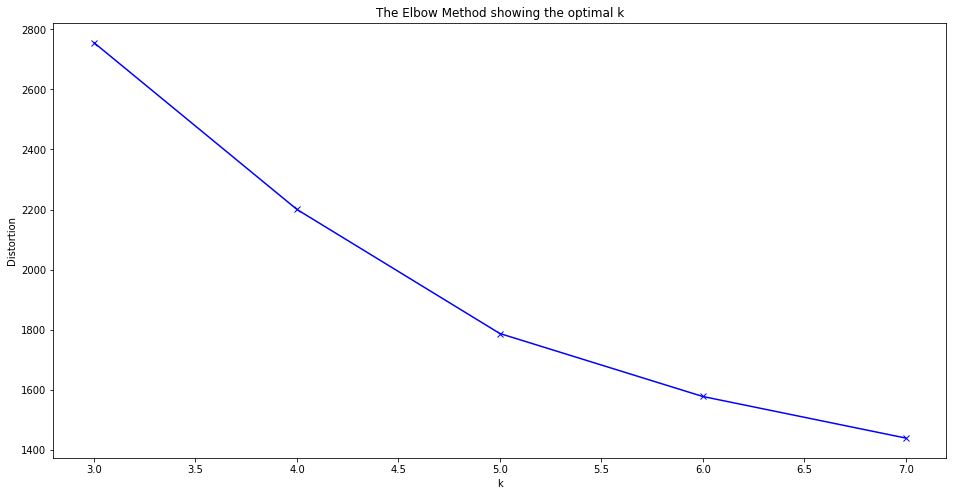

Optimal K : 5
k[5] Size of each Cluster :
cluster
0    3973
1    5606
2    3550
3    3104
4    4200
dtype: int64


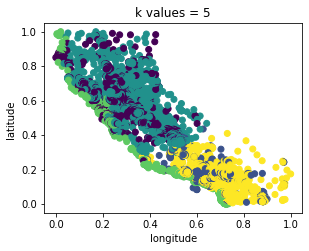

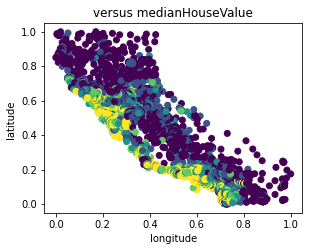

------------------------------------
Model Type :  em
silhouette score[3] : 0.557721
silhouette score[4] : 0.605168
silhouette score[5] : 0.686849
silhouette score[6] : 0.680702
silhouette score[7] : 0.689654
Optimal K : 5
k[5] Size of each Cluster :
cluster
0    1960
1    3564
2    3149
3    3107
4    8653
dtype: int64


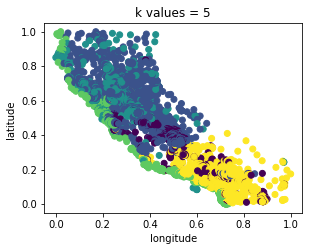

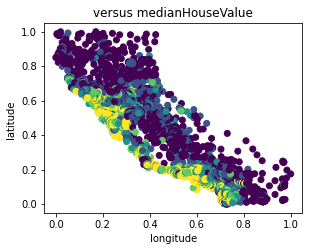

------------------------------------
Scaler Type :  standard
------------------------------------
Model Type :  k-means
silhouette score[3] : 0.311081
silhouette score[4] : 0.358349
silhouette score[5] : 0.358173
silhouette score[6] : 0.400288
silhouette score[7] : 0.372132


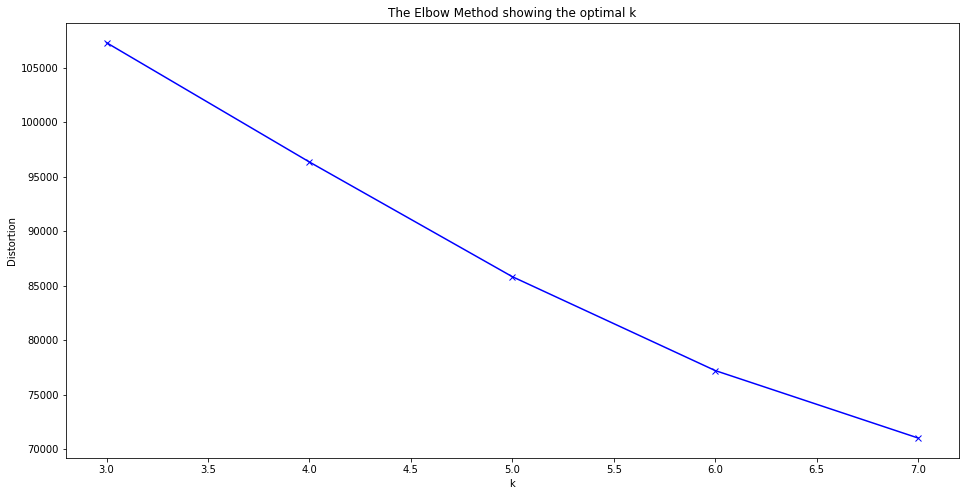

Optimal K : 5
k[5] Size of each Cluster :
cluster
0    5156
1    2366
2    1689
3    8382
4    2840
dtype: int64


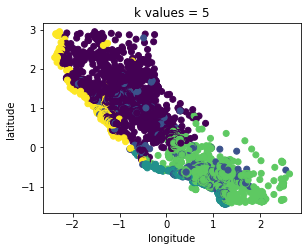

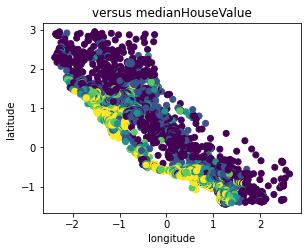

------------------------------------
Model Type :  em
silhouette score[3] : 0.164906
silhouette score[4] : 0.257779
silhouette score[5] : 0.342955
silhouette score[6] : 0.321465
silhouette score[7] : 0.316750
Optimal K : 5
k[5] Size of each Cluster :
cluster
0    4989
1    2519
2     734
3    3071
4    9120
dtype: int64


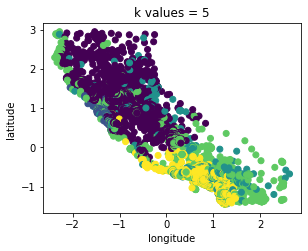

In [32]:
#Main

encoder =  []
scaler = []
model = []

train = df_label

print("------------------------------------")
print("Type Your Encoder Type with String (Ex. label ordinal)")
print("Encoder type : <label, oridnal, onehot>")
encoder = list(input().split())
print(encoder)

print("------------------------------------")
print("Type Your Scaler Type with String (Ex. minmax standard)")
print("Scaler type : <minmax, standard, robust>")
scaler = list(input().split())

print("------------------------------------")
print("Type Your Clustering Model Type with String (Ex. k-means em clarans dbscan affinity)")
print("Model type : <k-means, em, clarans, dbscan, affinity>")
model = list(input().split())

AutoML(scaler, encoder, model,df_label)
